In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [21]:
df = pd.read_csv('Housing.csv')

In [22]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [25]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [26]:
encoders = {}
for col in df.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

In [27]:
X = df.drop(['price'], axis=1)

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

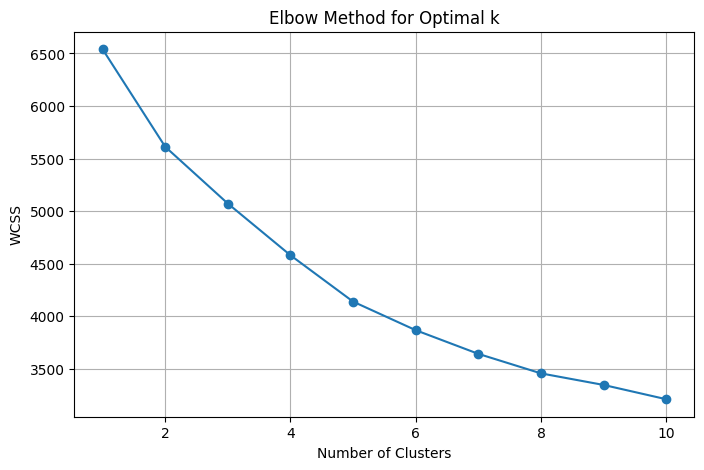

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [31]:
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=20, max_iter=300, random_state=42)


In [32]:
clusters = final_kmeans.fit_predict(X_scaled)
df["Cluster"]=clusters

In [18]:
clusters = kmeans.fit_predict(X_scaled)

In [19]:
df['Cluster'] = clusters

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

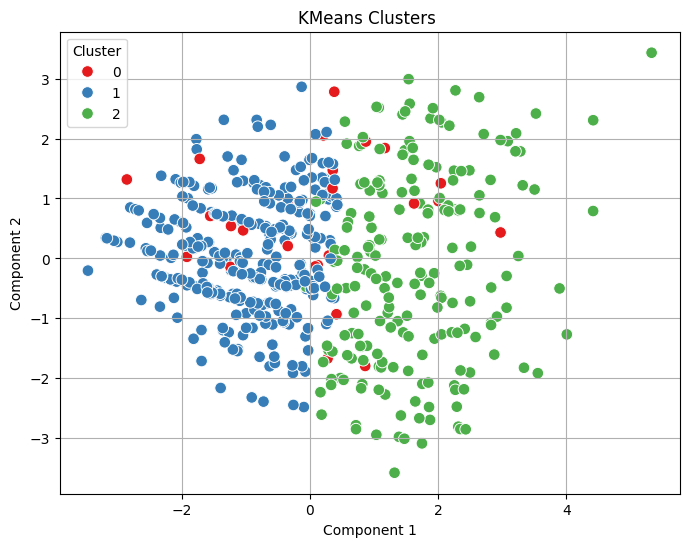

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=70)
plt.title("KMeans Clusters ")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [35]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\brijm\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


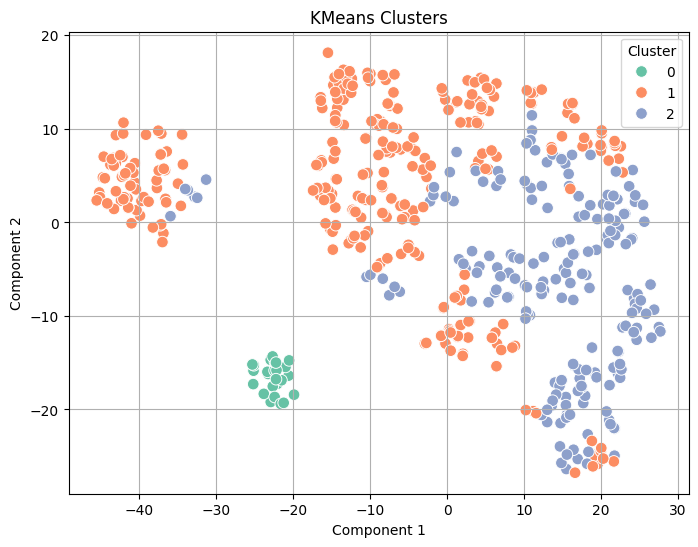

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='Set2', s=70)
plt.title("KMeans Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [38]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

In [39]:

print("Cluster-wise Feature Means:")
print(cluster_summary)

Cluster-wise Feature Means:
              price        area  bedrooms  bathrooms   stories  mainroad  \
Cluster                                                                    
0        5559960.00  5059.28000      3.12   1.440000  1.880000   0.84000   
1        3775231.25  4206.95625      2.75   1.096875  1.584375   0.79375   
2        6253972.20  6671.68500      3.29   1.570000  2.150000   0.96500   

         guestroom  basement  hotwaterheating  airconditioning  parking  \
Cluster                                                                   
0         0.160000   0.36000              1.0           0.0400   0.9600   
1         0.059375   0.24375              0.0           0.1375   0.3875   
2         0.370000   0.52000              0.0           0.6350   1.1500   

         prefarea  furnishingstatus  
Cluster                              
0           0.120          0.960000  
1           0.125          1.290625  
2           0.425          0.730000  


In [40]:
print("\nCluster Size Distribution:")
print(df['Cluster'].value_counts())


Cluster Size Distribution:
Cluster
1    320
2    200
0     25
Name: count, dtype: int64
